# 1. Perkenalan

- Nama Group : RepiuBoss
- Batch : 015
- Dataset : Review Tokopedia (https://www.kaggle.com/datasets/farhan999/tokopedia-product-reviews)
- Objectives : Collecting product or services comment reviews, clustering the isues from reviews, and sorting the data into easy readable summary.

# 2. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import gensim

# Exploratory Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Text Preprocessing

import re
import string
from nltk.tokenize import word_tokenize
# import nltk.stem as stemmer
from nltk.stem.porter import *
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as stemmer

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, TextVectorization, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Dense

from urllib import request
from PIL import Image

In [2]:
# Download Stopwords and Punkt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3. Data Loading

In [3]:
# Load Dataset

data = pd.read_csv('product_reviews_dirty.csv')
data

Unnamed: 0                                               text  rating  \
0               1             Barang sesuai pesanan dan cepat sampai       5   
1               2                           Barang bagus harga murah       5   
2               3    Paket rapi...mantap....cepat....sampe ke tujuan       5   
3               4                         ya saya puas dgn barangnya       5   
4               5                       Responya luar biasa b mantap       5   
...           ...                                                ...     ...   
40602       40889                gak bisa ditutup.. ukuran gak pas..       1   
40603       40890  Penjual krg peduli dan brg jelek. Brg yg dikir...       1   
40604       40891  pelayanan kurang sigap, berhari2 dr nanya baik...       1   
40605       40892  barang yg dikirim tsk sesuai wrn, kl memang dr...       1   
40606       40893  Pihak penjual memberikan respon yang buruk kep...       1   

          category                                       product_name  \
0      pertukangan  Staples Dekorasi Staples Kayu + Refill 8mm - S...   
1      pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
2      pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
3      pertukangan  ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   
4      pertukangan  Isi Refill Staples Jok Kulit Motor / Staple Gu...   
...            ...                                                ...   
40602     olahraga  MINERAL WATER POT WATER PURIFIER 28 liter BIO ...   
40603     olahraga  PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...   
40604     olahraga  EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...   
40605     olahraga  TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...   
40606     olahraga  SIT UP BENCH HITAM 3 SISI - SITUP BANCH INCLIN...   

       product_id   sold  shop_id  \
0       418660637      1  1740837   
1       416032545     11  1477109   
2       416032545     11  1477109   
3       102279869      5   771395   
4       190679689    787   969999   
...           ...    ...      ...   
40602   144442054      2   648559   
40603   313781913      1   648559   
40604    71873370      1   648559   
40605   201690705      2   648559   
40606    78857201          648559   

                                             product_url  
0      https://www.tokopedia.com/shakaonline87/staple...  
1      https://www.tokopedia.com/juraganperkakas/stap...  
2      https://www.tokopedia.com/juraganperkakas/stap...  
3      https://www.tokopedia.com/kamarmesin/alat-stap...  
4      https://www.tokopedia.com/mitrapersada/isi-ref...  
...                                                  ...  
40602  https://www.tokopedia.com/pusatdermawand/miner...  
40603  https://www.tokopedia.com/pusatdermawand/panci...  
40604  https://www.tokopedia.com/pusatdermawand/excid...  
40605  https://www.tokopedia.com/pusatdermawand/total...  
40606  https://www.tokopedia.com/pusatdermawand/sit-u...  

[40607 rows x 9 columns]

In [4]:
kamus_2 = pd.read_csv('kamus_2.txt', sep="	", header=None,names=['slang', 'fix'])

In [5]:
kamus_2.tail()

slang      fix
1314       istaa    nista
1315  benarjujur    benar
1316  benarjujur    jujur
1317       sayan   sayang
1318       mgkin  mungkin

In [6]:
kamus_2.drop(index=147, inplace=True)


In [7]:
kamus = kamus_2.append({'slang':'brg', 'fix':'barang'}, ignore_index=True)
kamus = kamus.append({'slang':'nggk', 'fix':'tidak'}, ignore_index=True)
kamus = kamus.append({'slang':'thankss', 'fix':'terima kasih'}, ignore_index=True)

/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6702/1821775587.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus_2.append({'slang':'brg', 'fix':'barang'}, ignore_index=True)
/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6702/1821775587.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus.append({'slang':'nggk', 'fix':'tidak'}, ignore_index=True)
/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6702/1821775587.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus.append({'slang':'thankss', 'fix':'terima kasih'}, ignore_index=True)


In [8]:
slang_list = kamus['slang'].tolist()
fix_list = kamus['fix'].tolist()

In [9]:
kamus.tail()

slang           fix
1316    sayan        sayang
1317    mgkin       mungkin
1318      brg        barang
1319     nggk         tidak
1320  thankss  terima kasih

In [10]:
data = data[data['category'].str.contains('handphone')]
data

Unnamed: 0                                               text  rating  \
3635         3659  respons cepat, pelayanan oke. smoga langganan....       5   
3636         3660                        Cakep dah... Lumayan dingin       5   
3637         3661  Nggk tau ori apa nggk yg penting berfungsi dan...       5   
3638         3662  mantap betul topp sesuai deskripsi dan gampang...       5   
3639         3663  Barang blom di buka. Mudah mudahan bagus dan t...       5   
...           ...                                                ...     ...   
10359       10435                    brg sudah sampai thankss ......       4   
10360       10436  Nah kan jadi bisa kasih review.. Respon cepat....       5   
10361       10437             Mantab gan, langsung ane pake..maknyus       5   
10362       10438  Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...       5   
10363       10439               barang ok...........................       5   

        category                                       product_name  \
3635   handphone  Baseus Holder Handphone Joystick with Cooling Fan   
3636   handphone  Baseus Holder Handphone Joystick with Cooling Fan   
3637   handphone  Baseus Holder Handphone Joystick with Cooling Fan   
3638   handphone  Baseus Holder Handphone Joystick with Cooling Fan   
3639   handphone  OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...   
...          ...                                                ...   
10359  handphone  Battery  |  Blackberry Battery Charger Bundle ...   
10360  handphone  Battery Charger | Blackberry Desktop Battery J...   
10361  handphone  Battery Charger | Blackberry Desktop Battery J...   
10362  handphone  BLACKBERRY EBC or Desktop Battery ASY-34812-00...   
10363  handphone  XIAOMI Charger CYSK10 2A with USB TYPE-C Original   

       product_id sold  shop_id  \
3635    323093469   16  3178761   
3636    323093469   16  3178761   
3637    323093469   16  3178761   
3638    323093469   16  3178761   
3639    484230658    9  1988271   
...           ...  ...      ...   
10359     1888064    2   105244   
10360     3683652    3   105244   
10361     3683652    3   105244   
10362     1592980    1   105244   
10363    42034026    1   105244   

                                             product_url  
3635   https://www.tokopedia.com/nicnaddigital/baseus...  
3636   https://www.tokopedia.com/nicnaddigital/baseus...  
3637   https://www.tokopedia.com/nicnaddigital/baseus...  
3638   https://www.tokopedia.com/nicnaddigital/baseus...  
3639   https://www.tokopedia.com/planet-cell/oppo-f11...  
...                                                  ...  
10359  https://www.tokopedia.com/janbun/battery-black...  
10360  https://www.tokopedia.com/janbun/battery-charg...  
10361  https://www.tokopedia.com/janbun/battery-charg...  
10362  https://www.tokopedia.com/janbun/blackberry-eb...  
10363  https://www.tokopedia.com/janbun/xiaomi-charge...  

[6136 rows x 9 columns]

In [11]:
# Reset Index

data.reset_index(drop=True, inplace=True)
data

Unnamed: 0                                               text  rating  \
0           3659  respons cepat, pelayanan oke. smoga langganan....       5   
1           3660                        Cakep dah... Lumayan dingin       5   
2           3661  Nggk tau ori apa nggk yg penting berfungsi dan...       5   
3           3662  mantap betul topp sesuai deskripsi dan gampang...       5   
4           3663  Barang blom di buka. Mudah mudahan bagus dan t...       5   
...          ...                                                ...     ...   
6131       10435                    brg sudah sampai thankss ......       4   
6132       10436  Nah kan jadi bisa kasih review.. Respon cepat....       5   
6133       10437             Mantab gan, langsung ane pake..maknyus       5   
6134       10438  Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...       5   
6135       10439               barang ok...........................       5   

       category                                       product_name  \
0     handphone  Baseus Holder Handphone Joystick with Cooling Fan   
1     handphone  Baseus Holder Handphone Joystick with Cooling Fan   
2     handphone  Baseus Holder Handphone Joystick with Cooling Fan   
3     handphone  Baseus Holder Handphone Joystick with Cooling Fan   
4     handphone  OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...   
...         ...                                                ...   
6131  handphone  Battery  |  Blackberry Battery Charger Bundle ...   
6132  handphone  Battery Charger | Blackberry Desktop Battery J...   
6133  handphone  Battery Charger | Blackberry Desktop Battery J...   
6134  handphone  BLACKBERRY EBC or Desktop Battery ASY-34812-00...   
6135  handphone  XIAOMI Charger CYSK10 2A with USB TYPE-C Original   

      product_id sold  shop_id  \
0      323093469   16  3178761   
1      323093469   16  3178761   
2      323093469   16  3178761   
3      323093469   16  3178761   
4      484230658    9  1988271   
...          ...  ...      ...   
6131     1888064    2   105244   
6132     3683652    3   105244   
6133     3683652    3   105244   
6134     1592980    1   105244   
6135    42034026    1   105244   

                                            product_url  
0     https://www.tokopedia.com/nicnaddigital/baseus...  
1     https://www.tokopedia.com/nicnaddigital/baseus...  
2     https://www.tokopedia.com/nicnaddigital/baseus...  
3     https://www.tokopedia.com/nicnaddigital/baseus...  
4     https://www.tokopedia.com/planet-cell/oppo-f11...  
...                                                 ...  
6131  https://www.tokopedia.com/janbun/battery-black...  
6132  https://www.tokopedia.com/janbun/battery-charg...  
6133  https://www.tokopedia.com/janbun/battery-charg...  
6134  https://www.tokopedia.com/janbun/blackberry-eb...  
6135  https://www.tokopedia.com/janbun/xiaomi-charge...  

[6136 rows x 9 columns]

In [12]:
data.head()

Unnamed: 0                                               text  rating  \
0        3659  respons cepat, pelayanan oke. smoga langganan....       5   
1        3660                        Cakep dah... Lumayan dingin       5   
2        3661  Nggk tau ori apa nggk yg penting berfungsi dan...       5   
3        3662  mantap betul topp sesuai deskripsi dan gampang...       5   
4        3663  Barang blom di buka. Mudah mudahan bagus dan t...       5   

    category                                       product_name  product_id  \
0  handphone  Baseus Holder Handphone Joystick with Cooling Fan   323093469   
1  handphone  Baseus Holder Handphone Joystick with Cooling Fan   323093469   
2  handphone  Baseus Holder Handphone Joystick with Cooling Fan   323093469   
3  handphone  Baseus Holder Handphone Joystick with Cooling Fan   323093469   
4  handphone  OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...   484230658   

  sold  shop_id                                        product_url  
0   16  3178761  https://www.tokopedia.com/nicnaddigital/baseus...  
1   16  3178761  https://www.tokopedia.com/nicnaddigital/baseus...  
2   16  3178761  https://www.tokopedia.com/nicnaddigital/baseus...  
3   16  3178761  https://www.tokopedia.com/nicnaddigital/baseus...  
4    9  1988271  https://www.tokopedia.com/planet-cell/oppo-f11...

In [13]:
data.tail()

Unnamed: 0                                               text  rating  \
6131       10435                    brg sudah sampai thankss ......       4   
6132       10436  Nah kan jadi bisa kasih review.. Respon cepat....       5   
6133       10437             Mantab gan, langsung ane pake..maknyus       5   
6134       10438  Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...       5   
6135       10439               barang ok...........................       5   

       category                                       product_name  \
6131  handphone  Battery  |  Blackberry Battery Charger Bundle ...   
6132  handphone  Battery Charger | Blackberry Desktop Battery J...   
6133  handphone  Battery Charger | Blackberry Desktop Battery J...   
6134  handphone  BLACKBERRY EBC or Desktop Battery ASY-34812-00...   
6135  handphone  XIAOMI Charger CYSK10 2A with USB TYPE-C Original   

      product_id sold  shop_id  \
6131     1888064    2   105244   
6132     3683652    3   105244   
6133     3683652    3   105244   
6134     1592980    1   105244   
6135    42034026    1   105244   

                                            product_url  
6131  https://www.tokopedia.com/janbun/battery-black...  
6132  https://www.tokopedia.com/janbun/battery-charg...  
6133  https://www.tokopedia.com/janbun/battery-charg...  
6134  https://www.tokopedia.com/janbun/blackberry-eb...  
6135  https://www.tokopedia.com/janbun/xiaomi-charge...

In [14]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6136 non-null   int64 
 1   text          6136 non-null   object
 2   rating        6136 non-null   int64 
 3   category      6136 non-null   object
 4   product_name  6136 non-null   object
 5   product_id    6136 non-null   int64 
 6   sold          6136 non-null   object
 7   shop_id       6136 non-null   int64 
 8   product_url   6136 non-null   object
dtypes: int64(4), object(5)
memory usage: 431.6+ KB


Data terdiri dari `6,135 rows` dan `9 columns` :

- `9 String`

In [15]:
data.to_csv('handphone.csv')

# 4. Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='rating'>

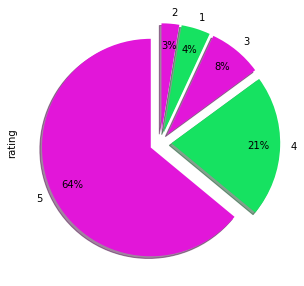

In [16]:
# Create Pie Chart to know rating distribution

data['rating'].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                  shadow=True,
                                  startangle=90,
                                  pctdistance=0.8,
                                  explode= (0.1,0.1,0.1,0.1,0.1),
                                  colors=['#e216d9', '#16e261'],
                                  figsize=(5,5))

Data terdiri dari :

- `64%` adalah bintang 5
- `21%` adalah bintang 4
- `8%` adalah bintang 3
- `4%` adalah bintang 2
- `3%` adalah bintang 1



Word Cloud for 5 Star




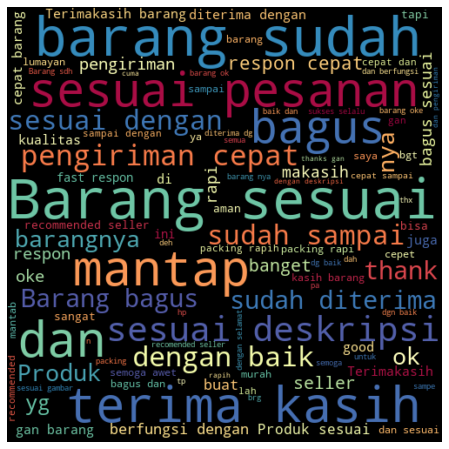

In [17]:
# Bintang 5 WordCloud
data_5 = data.loc[data['rating']==5]

#===
Message_body_5 = " ".join(insul for insul in data_5.text)

#== 
wc5 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 5 Star\n\n')
wc5.generate(Message_body_5)
plt.figure(figsize=(16, 8))
plt.imshow(wc5, interpolation='bilinear')
plt.axis('off')
plt.show()




Word Cloud for 4 Star




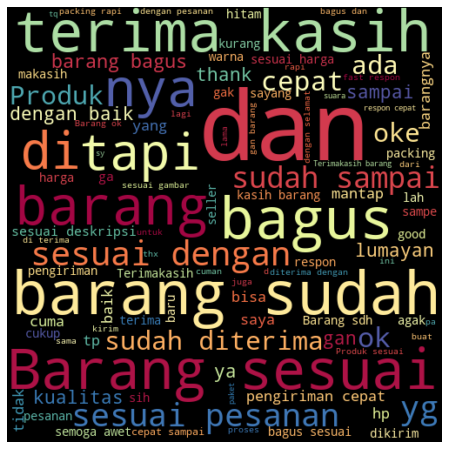

In [18]:
# Bintang 4 WordCloud
data_4 = data.loc[data['rating']==4]

#===
Message_body_4 = " ".join(insul for insul in data_4.text)

#== 
wc4 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 4 Star\n\n')
wc4.generate(Message_body_4)
plt.figure(figsize=(16, 8))
plt.imshow(wc4, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 3 Star




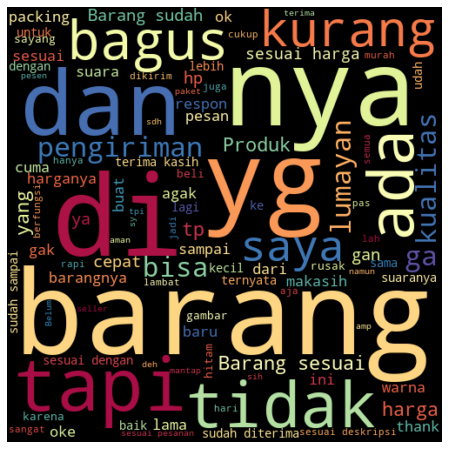

In [19]:
# Bintang 3 WordCloud
data_3 = data.loc[data['rating']==3]

#===
Message_body_3 = " ".join(insul for insul in data_3.text)

#== 
wc3 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 3 Star\n\n')
wc3.generate(Message_body_3)
plt.figure(figsize=(16, 8))
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 2 Star




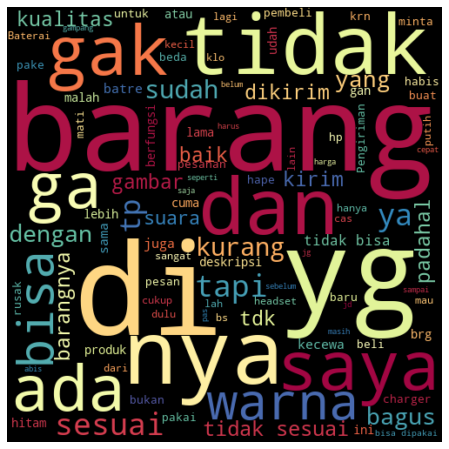

In [20]:
# Bintang 2 WordCloud
data_2 = data.loc[data['rating']==2]

#===
Message_body_2 = " ".join(insul for insul in data_2.text)

#== 
wc2 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 2 Star\n\n')
wc2.generate(Message_body_2)
plt.figure(figsize=(16, 8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 1 Star




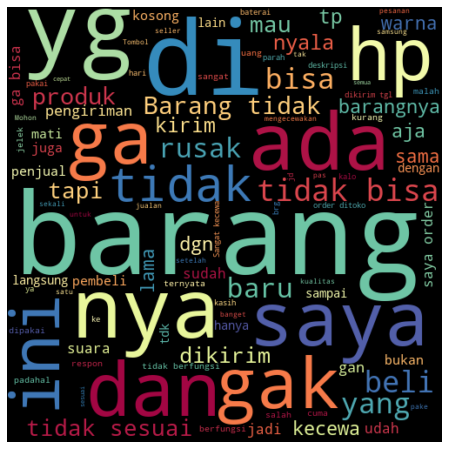

In [21]:
# Bintang 1 WordCloud
data_1 = data.loc[data['rating']==1]

#===
Message_body_1 = " ".join(insul for insul in data_1.text)

#== 
wc1 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 1 Star\n\n')
wc1.generate(Message_body_1)
plt.figure(figsize=(16, 8))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5. Data Preprocessing

## 5.1. Data Cleaning

In [22]:
values = [3, 4, 5]
data = data[data.rating.isin(values) == False]

In [23]:
data

Unnamed: 0                                               text  rating  \
12          4267       speaker tidak jelas, jadi belum bisa dipakai       2   
13          4268  Paketannya sdh sampai, kecewa ! Pantesan aja m...       2   
43          4299  Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...       1   
75          4331  barang sesuai deskripsi tetapi tidak bs menemp...       2   
113         4369  Saya pikir bahannya bagus.. tp ya sudahlah.. w...       2   
...          ...                                                ...     ...   
5993       10297  Barang tidak lengkap .tidak sesuwai jawaban di...       1   
6002       10306  Photo transistor tidak sesuai dengan produk yg...       1   
6098       10402              Barangnya sampai tidak sesuai pesanan       1   
6102       10406  alhamduliah, barang sudah diterima.\ntapi kang...       2   
6112       10416  kayaknya enggak ori, pengisian lambat tidak se...       2   

       category                                       product_name  \
12    handphone  HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...   
13    handphone  HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...   
43    handphone  Car phone holder 360 derajat model jepit smart...   
75    handphone  Car phone holder 360 derajat model jepit smart...   
113   handphone  Kaca pembesar Layar Hp/ Enlarged Screen Handphone   
...         ...                                                ...   
5993  handphone  RJH30E2 360V 30A Transistor Mosfet IGBT TO220 ...   
6002  handphone  D2553 2SD2553 2S D2553 2553 Silicon NPN Transi...   
6098  handphone         SAMSUNG Charger ATADM10EBE - D900 Original   
6102  handphone               Charger | Blackberry HDWQ10 Original   
6112  handphone                      Charger | SONY EP880 Original   

      product_id sold  shop_id  \
12     411502661  108  4366642   
13     411502661  108  4366642   
43     206580458  156   442217   
75     206580458  156   442217   
113    288580870  703  2993850   
...          ...  ...      ...   
5993   339057766   16   715011   
6002   339117996    5   715011   
6098     1822915    1   105244   
6102     2269322    8   105244   
6112     2806262   13   105244   

                                            product_url  
12    https://www.tokopedia.com/fortuneid29/hp-samsu...  
13    https://www.tokopedia.com/fortuneid29/hp-samsu...  
43    https://www.tokopedia.com/king-accessories/car...  
75    https://www.tokopedia.com/king-accessories/car...  
113   https://www.tokopedia.com/jsn25/kaca-pembesar-...  
...                                                 ...  
5993  https://www.tokopedia.com/hpasesoris/rjh30e2-3...  
6002  https://www.tokopedia.com/hpasesoris/d2553-2sd...  
6098  https://www.tokopedia.com/janbun/samsung-charg...  
6102  https://www.tokopedia.com/janbun/charger-black...  
6112  https://www.tokopedia.com/janbun/charger-sony-...  

[425 rows x 9 columns]

## 5.2. Get Data for Model Inference

In [24]:
# Get Data for model Inference

data_inf = data.sample(10, random_state=25)
data_inf

Unnamed: 0                                               text  rating  \
1102        5370  Gan knp setelah d pasang kartu hp gg nyala mal...       1   
1490        5759          Produk baru seminggu udh mati. Gimana sih       1   
3011        7287  Produknya ternyata kosong,tp gpp lah.. Uangnya...       1   
1368        5637                              ga sama dengan gambar       1   
3402        7680  Tidak bisa digunakan, di charge 1x langsung ga...       2   
5946       10249                         Bukan barang baru, ic mati       1   
4516        8805  timbangan tidak sesuai... beda sampai  8 kg pa...       1   
3634        7914  Pesen 2 pcs yang satunya mati total, udah masu...       1   
4690        8979                  Tidak bisa di pakai gan barangnya       1   
1056        5324        Terima kasih banyak ooo tapi barang gak ori       1   

       category                                       product_name  \
1102  handphone                    NOKIA 130 dual sim handphone hp   
1490  handphone  Samsung lipat flip Caramel GT-E1272 samsung hp...   
3011  handphone  &#40;EA033&#41; Emergency Lampu/Light Surya SQ...   
1368  handphone                    NOKIA 130 dual sim handphone hp   
3402  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...   
5946  handphone          ITE IT8502E IT 8502E KXA JXS JXT JXA BF51   
4516  handphone  &#40;ED021&#41; Magic Saw Gergaji Magic Set Se...   
3634  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...   
4690  handphone  &#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...   
1056  handphone                    NOKIA 130 dual sim handphone hp   

      product_id   sold  shop_id  \
1102   266910555  2,7rb  2270419   
1490   322389014  2,2rb  3925407   
3011   262842858     89   113813   
1368   266910555  2,7rb  2270419   
3402    55299234  4,4rb   113813   
5946   338299875      2   715011   
4516   282043088    355   113813   
3634    55299234  4,4rb   113813   
4690   293439771    266   113813   
1056   266910555  2,7rb  2270419   

                                            product_url  
1102  https://www.tokopedia.com/anshopp123/nokia-130...  
1490  https://www.tokopedia.com/hpmurahgrosirr/samsu...  
3011  https://www.tokopedia.com/handphonetiam/ea033-...  
1368  https://www.tokopedia.com/anshopp123/nokia-130...  
3402  https://www.tokopedia.com/handphonetiam/headse...  
5946  https://www.tokopedia.com/hpasesoris/ite-it850...  
4516  https://www.tokopedia.com/handphonetiam/ed021-...  
3634  https://www.tokopedia.com/handphonetiam/headse...  
4690  https://www.tokopedia.com/handphonetiam/ia034-...  
1056  https://www.tokopedia.com/anshopp123/nokia-130...

In [25]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

Unnamed: 0                                               text  rating  \
12          4267       speaker tidak jelas, jadi belum bisa dipakai       2   
13          4268  Paketannya sdh sampai, kecewa ! Pantesan aja m...       2   
43          4299  Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...       1   
75          4331  barang sesuai deskripsi tetapi tidak bs menemp...       2   
113         4369  Saya pikir bahannya bagus.. tp ya sudahlah.. w...       2   
...          ...                                                ...     ...   
5993       10297  Barang tidak lengkap .tidak sesuwai jawaban di...       1   
6002       10306  Photo transistor tidak sesuai dengan produk yg...       1   
6098       10402              Barangnya sampai tidak sesuai pesanan       1   
6102       10406  alhamduliah, barang sudah diterima.\ntapi kang...       2   
6112       10416  kayaknya enggak ori, pengisian lambat tidak se...       2   

       category                                       product_name  \
12    handphone  HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...   
13    handphone  HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...   
43    handphone  Car phone holder 360 derajat model jepit smart...   
75    handphone  Car phone holder 360 derajat model jepit smart...   
113   handphone  Kaca pembesar Layar Hp/ Enlarged Screen Handphone   
...         ...                                                ...   
5993  handphone  RJH30E2 360V 30A Transistor Mosfet IGBT TO220 ...   
6002  handphone  D2553 2SD2553 2S D2553 2553 Silicon NPN Transi...   
6098  handphone         SAMSUNG Charger ATADM10EBE - D900 Original   
6102  handphone               Charger | Blackberry HDWQ10 Original   
6112  handphone                      Charger | SONY EP880 Original   

      product_id sold  shop_id  \
12     411502661  108  4366642   
13     411502661  108  4366642   
43     206580458  156   442217   
75     206580458  156   442217   
113    288580870  703  2993850   
...          ...  ...      ...   
5993   339057766   16   715011   
6002   339117996    5   715011   
6098     1822915    1   105244   
6102     2269322    8   105244   
6112     2806262   13   105244   

                                            product_url  
12    https://www.tokopedia.com/fortuneid29/hp-samsu...  
13    https://www.tokopedia.com/fortuneid29/hp-samsu...  
43    https://www.tokopedia.com/king-accessories/car...  
75    https://www.tokopedia.com/king-accessories/car...  
113   https://www.tokopedia.com/jsn25/kaca-pembesar-...  
...                                                 ...  
5993  https://www.tokopedia.com/hpasesoris/rjh30e2-3...  
6002  https://www.tokopedia.com/hpasesoris/d2553-2sd...  
6098  https://www.tokopedia.com/janbun/samsung-charg...  
6102  https://www.tokopedia.com/janbun/charger-black...  
6112  https://www.tokopedia.com/janbun/charger-sony-...  

[415 rows x 9 columns]

In [26]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

Unnamed: 0                                               text  rating  \
0        5370  Gan knp setelah d pasang kartu hp gg nyala mal...       1   
1        5759          Produk baru seminggu udh mati. Gimana sih       1   
2        7287  Produknya ternyata kosong,tp gpp lah.. Uangnya...       1   
3        5637                              ga sama dengan gambar       1   
4        7680  Tidak bisa digunakan, di charge 1x langsung ga...       2   
5       10249                         Bukan barang baru, ic mati       1   
6        8805  timbangan tidak sesuai... beda sampai  8 kg pa...       1   
7        7914  Pesen 2 pcs yang satunya mati total, udah masu...       1   
8        8979                  Tidak bisa di pakai gan barangnya       1   
9        5324        Terima kasih banyak ooo tapi barang gak ori       1   

    category                                       product_name  product_id  \
0  handphone                    NOKIA 130 dual sim handphone hp   266910555   
1  handphone  Samsung lipat flip Caramel GT-E1272 samsung hp...   322389014   
2  handphone  &#40;EA033&#41; Emergency Lampu/Light Surya SQ...   262842858   
3  handphone                    NOKIA 130 dual sim handphone hp   266910555   
4  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...    55299234   
5  handphone          ITE IT8502E IT 8502E KXA JXS JXT JXA BF51   338299875   
6  handphone  &#40;ED021&#41; Magic Saw Gergaji Magic Set Se...   282043088   
7  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...    55299234   
8  handphone  &#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...   293439771   
9  handphone                    NOKIA 130 dual sim handphone hp   266910555   

    sold  shop_id                                        product_url  
0  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...  
1  2,2rb  3925407  https://www.tokopedia.com/hpmurahgrosirr/samsu...  
2     89   113813  https://www.tokopedia.com/handphonetiam/ea033-...  
3  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...  
4  4,4rb   113813  https://www.tokopedia.com/handphonetiam/headse...  
5      2   715011  https://www.tokopedia.com/hpasesoris/ite-it850...  
6    355   113813  https://www.tokopedia.com/handphonetiam/ed021-...  
7  4,4rb   113813  https://www.tokopedia.com/handphonetiam/headse...  
8    266   113813  https://www.tokopedia.com/handphonetiam/ia034-...  
9  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...

## 5.3. Text to Lowercase, Removing Punctuations, Removing Other Non Needed Texts

In [27]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Removing Punctuations
  text = text.translate(str.maketrans('', '', string.punctuation))

  # 11. Tokenization
  sfg = word_tokenize(text)

  for x in range(len(sfg)):
    for i in range(len(slang_list)):
      if sfg[x] == slang_list[i]:
        sfg[x] = fix_list[i]
      else:
        pass

  from nltk.util import ngrams
  _2gram = [' '.join(e) for e in ngrams(sfg, 2)]
  _3gram = [' '.join(e) for e in ngrams(sfg, 3)]
  text = sfg + _2gram + _3gram

  
  #text2 = ' '.join(sfg)

  text = np.array(text)

  
  return text

In [28]:
# Applying Preprocessing to all Documents

data_train_test['text_processed'] = data_train_test['text'].apply(lambda x: text_process(x))

In [29]:
Message_body = data_train_test['text']
Message_body

0           speaker tidak jelas, jadi belum bisa dipakai
1      Paketannya sdh sampai, kecewa ! Pantesan aja m...
2      Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...
3      barang sesuai deskripsi tetapi tidak bs menemp...
4      Saya pikir bahannya bagus.. tp ya sudahlah.. w...
                             ...                        
410    Barang tidak lengkap .tidak sesuwai jawaban di...
411    Photo transistor tidak sesuai dengan produk yg...
412                Barangnya sampai tidak sesuai pesanan
413    alhamduliah, barang sudah diterima.\ntapi kang...
414    kayaknya enggak ori, pengisian lambat tidak se...
Name: text, Length: 415, dtype: object

In [30]:
Message_body = data_train_test['text_processed']
Message_body

0      [speaker, tidak, jelas, jadi, belum, bisa, dip...
1      [paketannya, sudah, sampai, kecewa, pantesan, ...
2      [beli, biji, patah, di, tempat, yang, sama, di...
3      [barang, sesuai, deskripsi, tetapi, tidak, bis...
4      [saya, pikir, bahannya, bagus, tapi, iya, suda...
                             ...                        
410    [barang, tidak, lengkap, tidak, sesuwai, jawab...
411    [photo, transistor, tidak, sesuai, dengan, pro...
412    [barangnya, sampai, tidak, sesuai, pesanan, ba...
413    [alhamduliah, barang, sudah, diterima, tapi, k...
414    [kayaknya, tidak, ori, pengisian, lambat, tida...
Name: text_processed, Length: 415, dtype: object

## 5.4. Bag of Words

In [31]:
dictionary = gensim.corpora.Dictionary(Message_body)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 15:
        break

0 belum
1 belum bisa
2 belum bisa dipakai
3 bisa
4 bisa dipakai
5 dipakai
6 jadi
7 jadi belum
8 jadi belum bisa
9 jelas
10 jelas jadi
11 jelas jadi belum
12 speaker
13 speaker tidak
14 speaker tidak jelas
15 tidak


In [32]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

## 5.5. TF-IDF

In [33]:
bow_corpus = [dictionary.doc2bow(doc) for doc in Message_body]

In [34]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3411118523221793), (1, 0.72371281438678), (2, 0.5999020474191581)]


# 6. Model Definition

In [35]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2, random_state=5)

In [36]:
for idx, topic in lda_model.print_topics(-1, num_words=30):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.073*"saya" + 0.054*"barang" + 0.043*"dan" + 0.037*"sudah" + 0.034*"dikirim" + 0.031*"juga" + 0.030*"di" + 0.028*"bisa" + 0.027*"jadi" + 0.026*"tapi" + 0.025*"ini" + 0.024*"pakai" + 0.023*"barang tidak" + 0.022*"habis" + 0.022*"tidak bisa" + 0.021*"barangnya" + 0.019*"cepat" + 0.019*"baterai" + 0.019*"nyala" + 0.017*"nya" + 0.016*"di pakai" + 0.016*"karena" + 0.015*"bahkan" + 0.015*"banget" + 0.015*"sampai" + 0.014*"lama" + 0.013*"bisa di" + 0.011*"pesan" + 0.011*"yang" + 0.010*"uang"
Topic: 1 
Words: 0.066*"barang" + 0.056*"berfungsi" + 0.050*"bisa" + 0.046*"tidak bisa" + 0.045*"tidak berfungsi" + 0.040*"nya" + 0.038*"sesuai" + 0.034*"di" + 0.033*"suara" + 0.024*"tidak sesuai" + 0.023*"sekali" + 0.023*"nyala" + 0.022*"batre" + 0.022*"kualitas" + 0.022*"barang tidak" + 0.020*"baik" + 0.020*"kosong" + 0.019*"kurang" + 0.018*"habis" + 0.017*"padahal" + 0.017*"barang tidak sesuai" + 0.014*"nya tidak" + 0.013*"sama sekali" + 0.013*"hanya" + 0.013*"saya" + 0.013*"deskripsi

# 7. Model Saving

In [37]:
# Save the Files

import joblib
import json

with open('lda_model.pkl', 'wb') as file_1:
  joblib.dump(lda_model, file_1)

# 8. Model Inference

In [38]:
# Load All Files

import joblib
import json 

with open('lda_model.pkl', 'rb') as file_1:
  lda_model = joblib.load(file_1)

In [39]:
# Display Inference-Set 

data_inf

Unnamed: 0                                               text  rating  \
0        5370  Gan knp setelah d pasang kartu hp gg nyala mal...       1   
1        5759          Produk baru seminggu udh mati. Gimana sih       1   
2        7287  Produknya ternyata kosong,tp gpp lah.. Uangnya...       1   
3        5637                              ga sama dengan gambar       1   
4        7680  Tidak bisa digunakan, di charge 1x langsung ga...       2   
5       10249                         Bukan barang baru, ic mati       1   
6        8805  timbangan tidak sesuai... beda sampai  8 kg pa...       1   
7        7914  Pesen 2 pcs yang satunya mati total, udah masu...       1   
8        8979                  Tidak bisa di pakai gan barangnya       1   
9        5324        Terima kasih banyak ooo tapi barang gak ori       1   

    category                                       product_name  product_id  \
0  handphone                    NOKIA 130 dual sim handphone hp   266910555   
1  handphone  Samsung lipat flip Caramel GT-E1272 samsung hp...   322389014   
2  handphone  &#40;EA033&#41; Emergency Lampu/Light Surya SQ...   262842858   
3  handphone                    NOKIA 130 dual sim handphone hp   266910555   
4  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...    55299234   
5  handphone          ITE IT8502E IT 8502E KXA JXS JXT JXA BF51   338299875   
6  handphone  &#40;ED021&#41; Magic Saw Gergaji Magic Set Se...   282043088   
7  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...    55299234   
8  handphone  &#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...   293439771   
9  handphone                    NOKIA 130 dual sim handphone hp   266910555   

    sold  shop_id                                        product_url  
0  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...  
1  2,2rb  3925407  https://www.tokopedia.com/hpmurahgrosirr/samsu...  
2     89   113813  https://www.tokopedia.com/handphonetiam/ea033-...  
3  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...  
4  4,4rb   113813  https://www.tokopedia.com/handphonetiam/headse...  
5      2   715011  https://www.tokopedia.com/hpasesoris/ite-it850...  
6    355   113813  https://www.tokopedia.com/handphonetiam/ed021-...  
7  4,4rb   113813  https://www.tokopedia.com/handphonetiam/headse...  
8    266   113813  https://www.tokopedia.com/handphonetiam/ia034-...  
9  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...

In [40]:
# Applying Preprocessing to all Documents

data_inf['text_processed'] = data_inf['text'].apply(lambda x: text_process(x))
data_inf

Unnamed: 0                                               text  rating  \
0        5370  Gan knp setelah d pasang kartu hp gg nyala mal...       1   
1        5759          Produk baru seminggu udh mati. Gimana sih       1   
2        7287  Produknya ternyata kosong,tp gpp lah.. Uangnya...       1   
3        5637                              ga sama dengan gambar       1   
4        7680  Tidak bisa digunakan, di charge 1x langsung ga...       2   
5       10249                         Bukan barang baru, ic mati       1   
6        8805  timbangan tidak sesuai... beda sampai  8 kg pa...       1   
7        7914  Pesen 2 pcs yang satunya mati total, udah masu...       1   
8        8979                  Tidak bisa di pakai gan barangnya       1   
9        5324        Terima kasih banyak ooo tapi barang gak ori       1   

    category                                       product_name  product_id  \
0  handphone                    NOKIA 130 dual sim handphone hp   266910555   
1  handphone  Samsung lipat flip Caramel GT-E1272 samsung hp...   322389014   
2  handphone  &#40;EA033&#41; Emergency Lampu/Light Surya SQ...   262842858   
3  handphone                    NOKIA 130 dual sim handphone hp   266910555   
4  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...    55299234   
5  handphone          ITE IT8502E IT 8502E KXA JXS JXT JXA BF51   338299875   
6  handphone  &#40;ED021&#41; Magic Saw Gergaji Magic Set Se...   282043088   
7  handphone  Headset Bluetooth Mini S530 - Micro Sport Ster...    55299234   
8  handphone  &#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...   293439771   
9  handphone                    NOKIA 130 dual sim handphone hp   266910555   

    sold  shop_id                                        product_url  \
0  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...   
1  2,2rb  3925407  https://www.tokopedia.com/hpmurahgrosirr/samsu...   
2     89   113813  https://www.tokopedia.com/handphonetiam/ea033-...   
3  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...   
4  4,4rb   113813  https://www.tokopedia.com/handphonetiam/headse...   
5      2   715011  https://www.tokopedia.com/hpasesoris/ite-it850...   
6    355   113813  https://www.tokopedia.com/handphonetiam/ed021-...   
7  4,4rb   113813  https://www.tokopedia.com/handphonetiam/headse...   
8    266   113813  https://www.tokopedia.com/handphonetiam/ia034-...   
9  2,7rb  2270419  https://www.tokopedia.com/anshopp123/nokia-130...   

                                      text_processed  
0  [juragan, kenapa, setelah, di, pasang, kakak, ...  
1  [produk, baru, seminggu, sudah, mati, bagaiman...  
2  [produknya, ternyata, kosong, tapi, tidak apa-...  
3  [tidak, sama, dengan, gambar, tidak sama, sama...  
4  [tidak, bisa, digunakan, di, charge, x, langsu...  
5  [bukan, barang, baru, ic, mati, bukan barang, ...  
6  [timbangan, tidak, sesuai, beda, sampai, kg, p...  
7  [pesen, pcs, yang, satunya, mati, total, sudah...  
8  [tidak, bisa, di, pakai, juragan, barangnya, t...  
9  [terima, kasih, banyak, ooo, tapi, barang, tid...

In [41]:
Message_body_inf = data_inf['text_processed']
Message_body_inf

0    [juragan, kenapa, setelah, di, pasang, kakak, ...
1    [produk, baru, seminggu, sudah, mati, bagaiman...
2    [produknya, ternyata, kosong, tapi, tidak apa-...
3    [tidak, sama, dengan, gambar, tidak sama, sama...
4    [tidak, bisa, digunakan, di, charge, x, langsu...
5    [bukan, barang, baru, ic, mati, bukan barang, ...
6    [timbangan, tidak, sesuai, beda, sampai, kg, p...
7    [pesen, pcs, yang, satunya, mati, total, sudah...
8    [tidak, bisa, di, pakai, juragan, barangnya, t...
9    [terima, kasih, banyak, ooo, tapi, barang, tid...
Name: text_processed, dtype: object

In [48]:
bow_vector = dictionary.doc2bow(Message_body_inf[0])
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.8499537110328674	 Topic: 0.104*"bisa" + 0.084*"tidak bisa" + 0.052*"hp" + 0.037*"warna" + 0.036*"dan" + 0.035*"barang" + 0.033*"nya" + 0.029*"beli" + 0.028*"untuk" + 0.025*"di"
Score: 0.01667732372879982	 Topic: 0.073*"saya" + 0.054*"barang" + 0.043*"dan" + 0.037*"sudah" + 0.034*"dikirim" + 0.031*"juga" + 0.030*"di" + 0.028*"bisa" + 0.027*"jadi" + 0.026*"tapi"
Score: 0.01667524129152298	 Topic: 0.080*"barang" + 0.067*"yang" + 0.059*"di" + 0.040*"sama" + 0.032*"tapi" + 0.031*"dan" + 0.029*"ini" + 0.027*"saja" + 0.026*"barang yang" + 0.024*"sudah"
Score: 0.016673563048243523	 Topic: 0.132*"di" + 0.076*"yang" + 0.060*"barang" + 0.035*"tapi" + 0.029*"sudah" + 0.027*"nya" + 0.022*"pakai" + 0.021*"yang di" + 0.019*"di pakai" + 0.016*"sama"
Score: 0.016671989113092422	 Topic: 0.142*"saya" + 0.096*"dan" + 0.055*"karena" + 0.043*"ini" + 0.041*"order" + 0.036*"yang" + 0.035*"dikirim" + 0.029*"barang" + 0.028*"baru" + 0.027*"sampai"
Score: 0.016671760007739067	 Topic: 0.075*"barang" + 0.

# 9. Pengambilan Kesimpulan